#Perceptron

In [ ]:
import numpy as np
class Perceptron (object):
  ''' Perceptron
      ------------
      Parameters
      ------------
      eta : float
        Learning rate (0.0 e < eta < 1.0)
      n_iter : int
        Number of iterations over the training set.
      random_state : int
        Random number generator seed for weight initialization.
      Attributes
      -----------
      w_ : 1d-array
        Weights after fitting.
      errors_ : 1d-array
        Number of misclassifications (updates) in each epoch.
  '''
  def __init__ (self , n_iter = 50 , eta = 0.1, random_state=1):
    self . n_iter = n_iter
    self . eta = eta
    self . random_state = random_state

  def fit (self , X , y):
    ''' Fit training data.
        Parameters
        ----------
        X : {np.array}, shape = [n_samples, m_features]
          Training vectors, where n_samples is the number of samples and
          m_features is the number of features.
        y : {np.array}, shape = [n_samples]
          Target values.
        Returns
        -------
        self : object
    '''

    rgen = np.random.RandomState(self.random_state)
    if self.random_state is None:
      self.w_ = np.zeros(1 + len(X[0]))
    else:
      self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) ##shape, 0 filas, 1 columnas
    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for xi, yi in zip(X, y):
        update = self.eta * (yi - self.predict(xi))
        self.w_[0] += update
        self.w_[1:] += update * xi
        errors += int(update != 0.0) #Cuantas veces ha sido actualizado, no medimos erroes de clasificacion
      self.errors_.append(errors)
      print(f'Pesos: {self.w_}')
    return self

  def net_input (self , X):
    ''' Calculate net input
    Parameters
    ----------
    X : {np.array}, shape = [n_samples, m_features]
      Training vectors, where n_samples is the number of samples and
      m_features is the number of features.
    Returns
    -------
    {np.array}, shape = [n_samples]


    '''
    return np.dot(X, self.w_[1:]) + self.w_[0]  #Producto punto




  def predict (self , X):
    ''' Return class label after unit step
    Parameters
    ----------
    X : {np.array}, shape = [n_samples, m_features]
      Training vectors, where n_samples is the number of samples and
      m_features is the number of features.
    Returns
    -------
    {np.array}, shape = [n_samples]
      Returns an array of class labels after unit step

    '''
    return np.where(self.net_input(X) >= 0.0, 1, -1)

In [ ]:
X = np . array ([[0 ,0] ,[0 ,1] ,[1 ,0] ,[1 ,1]])
y = np . array ([1 ,1 ,1 , -1])
ppn = Perceptron ( n_iter =6 , eta =0.1,random_state=None)
ppn . fit (X , y )
print (f'Pesos: {ppn . w_ }')

Pesos: [-0.2 -0.2 -0.2]
Pesos: [ 0.  -0.4 -0.2]
Pesos: [ 0.2 -0.4 -0.2]
Pesos: [ 0.2 -0.4 -0.4]
Pesos: [ 0.4 -0.4 -0.2]
Pesos: [ 0.4 -0.4 -0.2]
Pesos: [ 0.4 -0.4 -0.2]


In [ ]:
ppn.predict(np.array([1,1]))

array(-1)

In [ ]:
X = np . array ([[0 ,0,1] ,[0 ,1,0] ,[1 ,0,0] ,[1,0 ,1],[1,1,1]])
y = np . array ([1 ,1 ,1,1 , -1])
ppn = Perceptron ( n_iter =10 , eta =0.1,random_state=None)
ppn . fit (X , y )
print (f'Pesos: {ppn . w_ }')

Pesos: [-0.2 -0.2 -0.2 -0.2]
Pesos: [ 0.  -0.4 -0.2 -0.2]
Pesos: [ 0.2 -0.4 -0.4 -0.2]
Pesos: [ 0.4 -0.4 -0.4 -0.2]
Pesos: [ 0.4 -0.4 -0.6 -0.2]
Pesos: [ 0.6 -0.4 -0.4 -0.2]
Pesos: [ 0.6 -0.4 -0.4 -0.2]
Pesos: [ 0.6 -0.4 -0.4 -0.2]
Pesos: [ 0.6 -0.4 -0.4 -0.2]
Pesos: [ 0.6 -0.4 -0.4 -0.2]
Pesos: [ 0.6 -0.4 -0.4 -0.2]


In [ ]:
ppn.predict(np.array([0,0,0]))

array(1)

In [ ]:
# Conjunto de datos Iris
import pandas as pd
df = pd.read_csv('https://bit.ly/38XWXS4',header=None)
df.tail(2)

,0,1,2,3,4
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
import numpy as np
X= df.iloc[0:100,[0,2]].values
y=df.iloc[0:100,4].values #Etiquestas en texto
y=np.array(np.where(y=='Iris-setosa',-1,1))
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

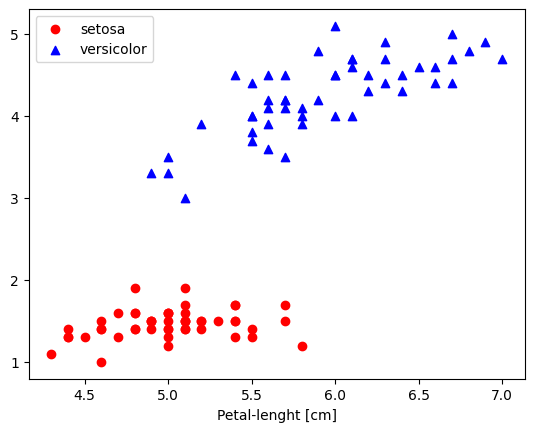

In [ ]:
# EDA
import matplotlib.pyplot as plt
plt.scatter(X[:50,0],X[:50,1],color ='red',marker='o',label='setosa')
plt.scatter(X[50:,0],X[50:,1],color ='blue',marker='^',label='versicolor')
plt.xlabel('Sepal-lenght [cm]')
plt.xlabel('Petal-lenght [cm]')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Linealmente separable, una linea que divida

Pesos: [0.21624345 1.39388244 0.93471828]
Pesos: [0.01624345 0.79388244 1.31471828]
Pesos: [-0.18375655  0.19388244  1.69471828]
Pesos: [-0.18375655  0.31388244  2.11471828]
Pesos: [-0.38375655 -0.70611756  1.83471828]
Pesos: [-0.38375655 -0.70611756  1.83471828]
Pesos: [-0.38375655 -0.70611756  1.83471828]
Pesos: [-0.38375655 -0.70611756  1.83471828]
Pesos: [-0.38375655 -0.70611756  1.83471828]
Pesos: [-0.38375655 -0.70611756  1.83471828]


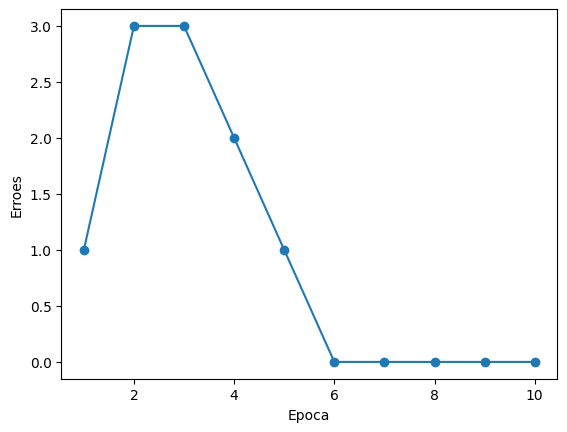

In [ ]:
ppn=Perceptron(eta=0.1,n_iter=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o')
plt.xlabel('Epoca')
plt.ylabel('Erroes')
plt.show()

In [ ]:
print(f'Pesos {ppn.w_}')

Pesos [-0.38375655 -0.70611756  1.83471828]


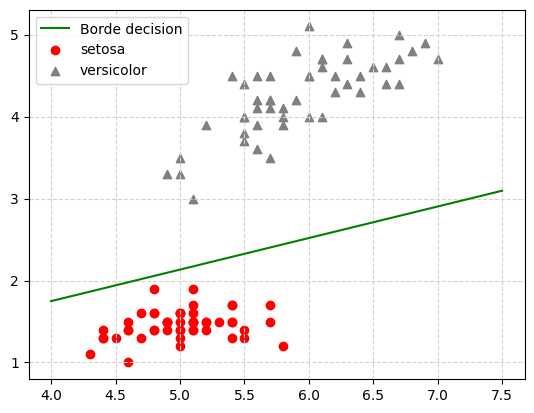

In [ ]:
# wo+w1*x1+w2*x2=0
#->x2=-(w0-w1*x1)/w2
#Borde de desicion
x1=np.linspace(4,7.5,2)
x2=-(ppn.w_[0]+ppn.w_[1]*x1)/ppn.w_[2]
plt.plot(x1,x2,'g',label = 'Borde decision')
#Clase -1 setosa
registros =y==-1
x1=X[registros][:,0]
x2=X[registros][:,1]
plt.scatter(x1,x2,c='r',marker='o',label='setosa')

#Clase 1 versicolor
registros =y==1
x1=X[registros][:,0]
x2=X[registros][:,1]
plt.scatter(x1,x2,c='gray',marker='^',label='versicolor')
plt.legend()
plt.grid(color='lightgray',linestyle='--')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier,resolution=0.2):
  colors =np.array(['lime','red','blue'])
  cmap =ListedColormap(colors[:len(np.unique(y))])
  #Superficie de decicion
  x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
  x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
  xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),
                       np.arange(x2_min,x2_max,resolution))
  Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
  Z=Z.reshape(xx1.shape)
  plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
  plt.xlim(xx1.min(),xx1.max())
  plt.ylim(xx2.min(),xx2.max())
  #conjuntos de clase
  plt.scatter(X[:,0],X[:,1],alpha=0.9,c=colors[y],edgecolors='black')

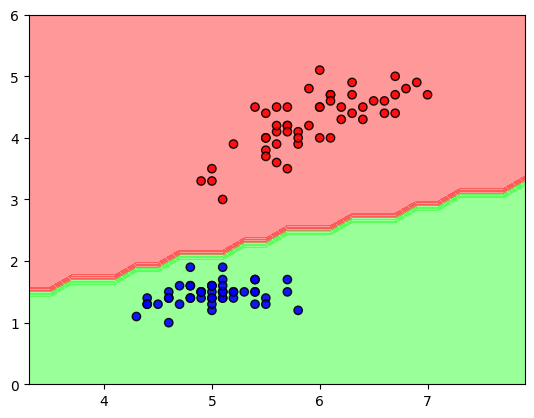

In [ ]:
plot_decision_regions(X,y,ppn,0.2)

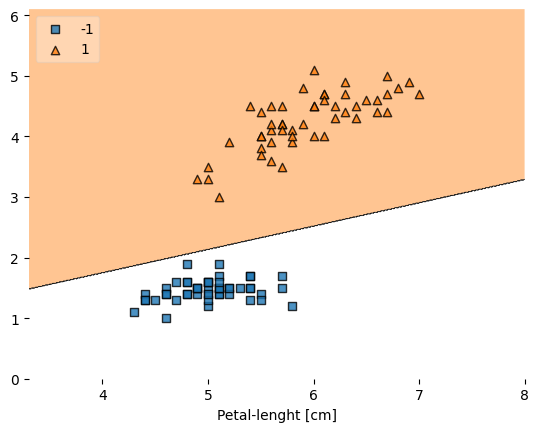

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
plot_decision_regions(X,y,clf=ppn,legend=2)
plt.xlabel('Sepal-lenght [cm]')
plt.xlabel('Petal-lenght [cm]')
plt.show()
